## trying clr transformation on compositional data

In [54]:
import numpy as np
import scipy as sp
import scipy.stats
from skbio.stats.composition import clr
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA

import pickle

import transform
import statistics
import simulation
import dsfdr

%matplotlib notebook
import matplotlib.pyplot as plt
import pylab

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
clr([0.8,0.2])

array([ 0.69314718, -0.69314718])

In [115]:
clr([0.3, 0.6])

array([-0.34657359,  0.34657359])

# compositional simulation 0

In [85]:
np.random.seed(31)

ss0 = [5, 10, 15, 20, 30, 40, 50, 100]
B = 100
sig_bh0 = []
sig_fbh0 = []
sig_ds0 = []

otu_bh0 = []
otu_fbh0 = []
otu_ds0 = []

pval_bh0 = []
pval_fbh0 = []
pval_ds0 = []

for j in ss0:
    for i in range(B):
        data0, labels0 = simulation.simulatedat(numsamples = j, numdiff=0, numc =100, numd=0,
                                               normalize = True)
        rej_bh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds0 = dsfdr.dsfdr(data0, labels0, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        r_bh0 = np.sum(rej_bh0[0])
        sig_bh0.append(r_bh0)
        pval_bh0.append(rej_bh0[2])
        
        r_fbh0 = np.sum(rej_fbh0[0])
        sig_fbh0.append(r_fbh0)
        pval_fbh0.append(rej_fbh0[2])

        r_ds0 = np.sum(rej_ds0[0])
        sig_ds0.append(r_ds0)
        pval_ds0.append(rej_ds0[2])

    otu_bh0.append(np.mean(sig_bh0))
    otu_fbh0.append(np.mean(sig_fbh0))
    otu_ds0.append(np.mean(sig_ds0))

In [86]:
with open("clr_simulation0.pkl", "wb") as f:
    pickle.dump((ss0, otu_bh0, otu_fbh0, otu_ds0, 
                 pval_bh0, pval_fbh0, pval_ds0), f)

<IPython.core.display.Javascript object>


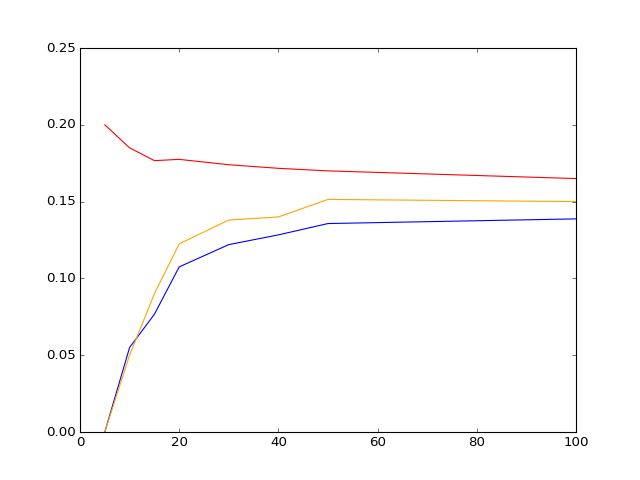

In [90]:
plt.figure()
plt.plot(ss0, otu_bh0, color = 'blue')
plt.plot(ss0, otu_fbh0, color = 'orange')
plt.plot(ss0, otu_ds0, color = 'red')

1.97311688312


<IPython.core.display.Javascript object>


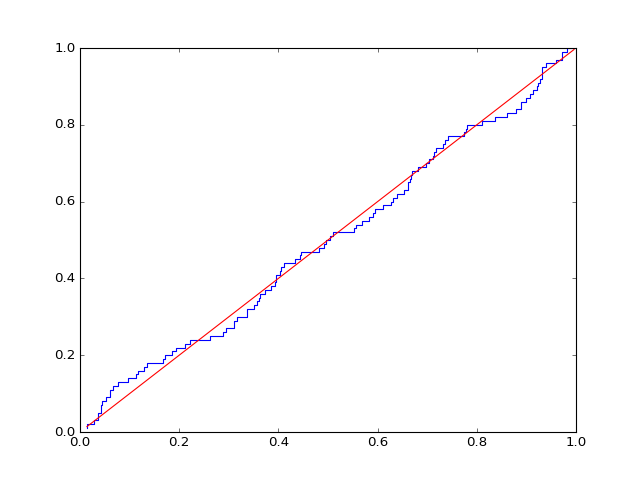

In [91]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
print(LA.norm(x - y, 1))

plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

## compositional simulation 1

In [116]:
data7, labels7 = simulation.simulatedat(numsamples = 20, numdiff=100, numc =100, 
                                               numd=800, normalize = True)

In [117]:
rej_ds7 = dsfdr.dsfdr(data7, labels7, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='dsfdr')

In [118]:
rej_ds7_clr = dsfdr.dsfdr(data7, labels7, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='dsfdr')

In [124]:
print(np.sum(rej_ds7[0]))
print(np.sum(np.where(rej_ds7[0])[0]>=100))
print(7/107)

107
7
0.06542056074766354


In [123]:
print(np.sum(rej_ds7_clr[0]))
print(np.sum(np.where(rej_ds7_clr[0])[0]>=100))
print(2/96)

96
2
0.020833333333333332


In [92]:
np.random.seed(31)

B = 100
ss1 = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
fdr_bh1 = []
fdr_fbh1 = []
fdr_ds1 = []

sig_bh1 = []
sig_fbh1 = []
sig_ds1 = []

otu_bh1 = []
otu_fbh1 = []
otu_ds1 = []

pval_bh1 = []
pval_fbh1 = []
pval_ds1 = []

FDR_bh1 = []
FDR_fbh1 = []
FDR_ds1 = []

for j in ss1:
    for i in range(B):
        data1,labels1 = simulation.simulatedat(numsamples = j, numdiff=100, numc =100, 
                                               numd=800, normalize = True)
        rej_bh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='bhfdr')
        rej_fbh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='filterBH')
        rej_ds1 = dsfdr.dsfdr(data1, labels1, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='dsfdr')
        
        v_bh1 = np.sum(np.where(rej_bh1[0])[0]>=100)
        r_bh1 = np.sum(rej_bh1[0])
        sig_bh1.append(r_bh1)
        fdr_bh1.append(v_bh1/r_bh1)
        pval_bh1.append(rej_bh1[2])
        
        v_fbh1 = np.sum(np.where(rej_fbh1[0])[0]>=100)
        r_fbh1 = np.sum(rej_fbh1[0])
        sig_fbh1.append(r_fbh1)
        fdr_fbh1.append(v_fbh1/r_fbh1)
        pval_fbh1.append(rej_fbh1[2])
        
        v_ds1 = np.sum(np.where(rej_ds1[0])[0]>=100)
        r_ds1 = np.sum(rej_ds1[0])
        sig_ds1.append(r_ds1)
        fdr_ds1.append(v_ds1/r_ds1)
        pval_ds1.append(rej_ds1[2])

    print('otu...: %s' %(j))   
    otu_bh1.append(np.mean(sig_bh1))
    otu_fbh1.append(np.mean(sig_fbh1))
    otu_ds1.append(np.mean(sig_ds1))
    
    print('FDR...: %s' %(j))
    FDR_bh1.append(np.nanmean(fdr_bh1))
    FDR_fbh1.append(np.nanmean(fdr_fbh1))
    FDR_ds1.append(np.nanmean(fdr_ds1))

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in long_scalars


otu...: 4
FDR...: 4


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in long_scalars


otu...: 5
FDR...: 5
otu...: 6
FDR...: 6
otu...: 7
FDR...: 7
otu...: 8
FDR...: 8
otu...: 9
FDR...: 9
otu...: 10
FDR...: 10
otu...: 15
FDR...: 15
otu...: 20
FDR...: 20
otu...: 30
FDR...: 30
otu...: 40
FDR...: 40
otu...: 50
FDR...: 50
otu...: 100
FDR...: 100


In [93]:
with open("clr_simulation1.pkl", "wb") as f:
    pickle.dump((ss1, otu_bh1, otu_fbh1, otu_ds1, 
                 FDR_bh1, FDR_fbh1, FDR_ds1, 
                 pval_bh1, pval_fbh1, pval_ds1), f)

<IPython.core.display.Javascript object>


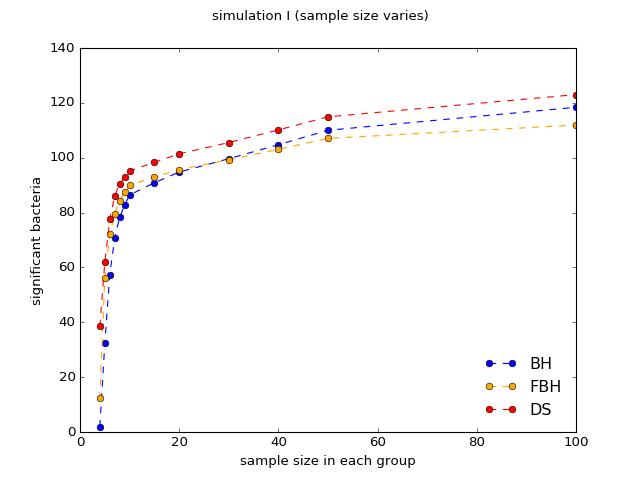

In [94]:
plt.figure()
plt.plot(ss1, otu_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1, otu_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, otu_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


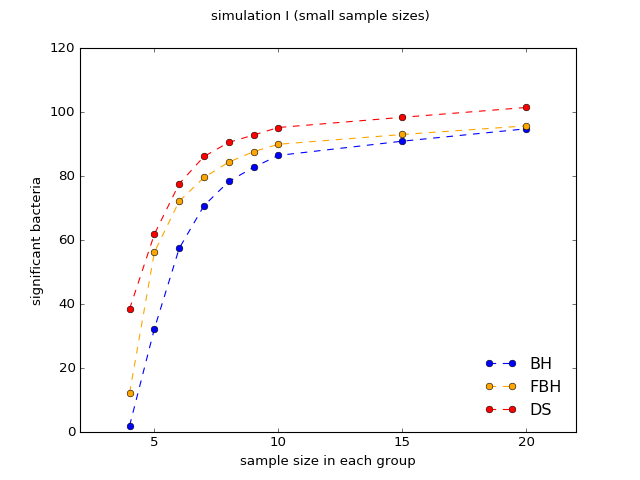

In [95]:
plt.figure()
plt.plot(ss1[0:9], otu_bh1[0:9], linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1[0:9], otu_fbh1[0:9], linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1[0:9], otu_ds1[0:9], linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.xlim([2, 22])
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (small sample sizes)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


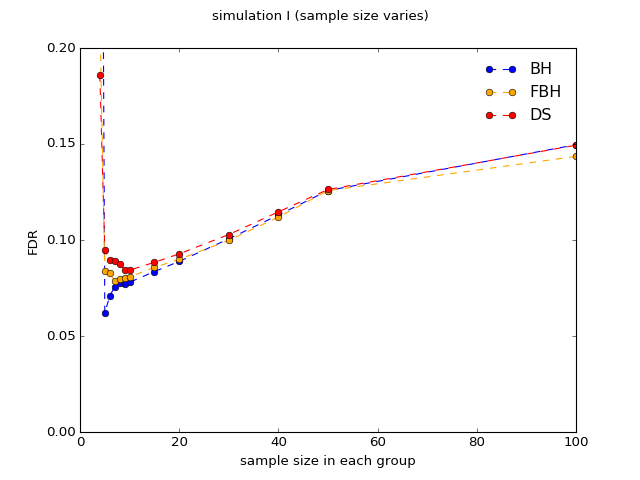

In [108]:
plt.figure()
plt.plot(ss1, FDR_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1, FDR_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, FDR_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
pylab.ylim([0, 0.2])
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('FDR')

In [ ]:
np.shape(pval_ds1)

In [109]:
# calculate L1 norms for sample size = 4, 6, 10

pval_ds1 = np.asarray(pval_ds1)
L1_4 = []
L1_6 = []
L1_10 = []

for i in range(100):
    x = pval_ds1[i, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_4.append(LA.norm(x - y, 1))

for j in np.arange(200, 300, 1):
    x = pval_ds1[j, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_6.append(LA.norm(x - y, 1))
    
for k in np.arange(600, 700, 1):
    x = pval_ds1[k, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_10.append(LA.norm(x - y, 1))   
    
print(np.mean(L1_4), np.mean(L1_6), np.mean(L1_10))

41.630681685 40.9960860806 38.568831635


<IPython.core.display.Javascript object>


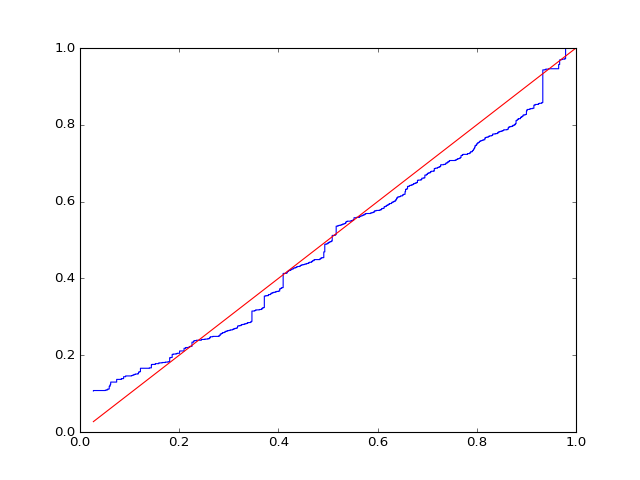

In [110]:
sample = pval_ds1[98]  # pvals for smaple size = 4
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')


<IPython.core.display.Javascript object>


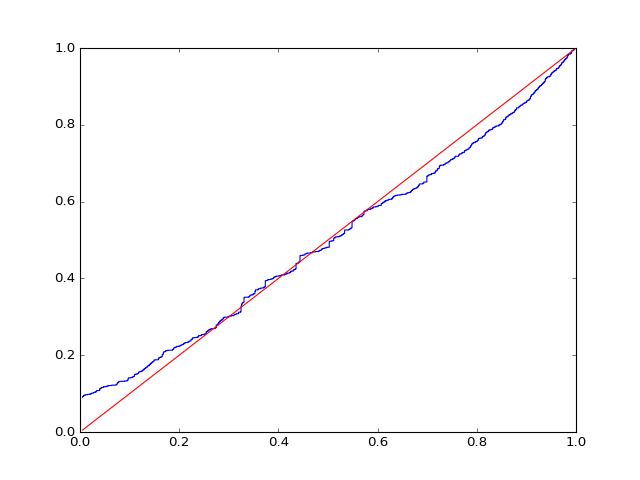

30.0602377622


In [111]:
sample = pval_ds1[298]  # pvals for smaple size = 6
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x-y, 1))

<IPython.core.display.Javascript object>


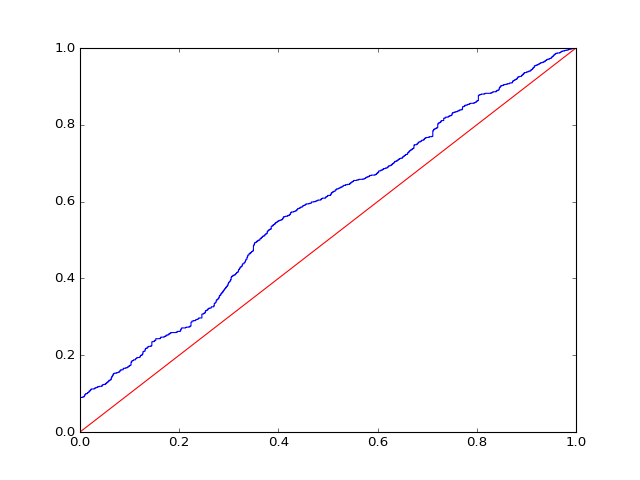

In [112]:
sample = pval_ds1[620]  # pvals for smaple size = 10
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')


## compositional simulation 2

In [ ]:
np.random.seed(31)

B = 100
d = [400,800,2000,4000,8000,10000,15000,20000]
fdr_bh2 = []
fdr_fbh2 = []
fdr_ds2 = []

sig_bh2 = []
sig_fbh2 = []
sig_ds2 = []

otu_bh2 = []
otu_fbh2 = []
otu_ds2 = []

FDR_bh2 = []
FDR_fbh2 = []
FDR_ds2 = []

pval_bh2 = []
pval_fbh2 = []
pval_ds2 = []

for j in d:
    for i in range(B):
        data2,labels2 = simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, 
                                               numd=j, normalize = True)
        rej_bh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds2 = dsfdr.dsfdr(data2, labels2, transform_type = 'clrdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        v_bh2 = np.sum(np.where(rej_bh2[0])[0]>=100)
        r_bh2 = np.sum(rej_bh2[0])
        sig_bh2.append(r_bh2)
        fdr_bh2.append(v_bh2/r_bh2)
        pval_bh2.append(rej_bh2[2])
        
        v_fbh2 = np.sum(np.where(rej_fbh2[0])[0]>=100)
        r_fbh2 = np.sum(rej_fbh2[0])
        sig_fbh2.append(r_fbh2)
        fdr_fbh2.append(v_fbh2/r_fbh2)
        pval_fbh2.append(rej_fbh2[2])
        
        v_ds2 = np.sum(np.where(rej_ds2[0])[0]>=100)
        r_ds2 = np.sum(rej_ds2[0])
        sig_ds2.append(r_ds2)
        fdr_ds2.append(v_ds2/r_ds2)
        pval_ds2.append(rej_ds2[2])
    
    print('otu...: %s' %(j)) 
    otu_bh2.append(np.mean(sig_bh2))
    otu_fbh2.append(np.mean(sig_fbh2))
    otu_ds2.append(np.mean(sig_ds2))
    
    print('FDR...: %s' %(j)) 
    FDR_bh2.append(np.nanmean(fdr_bh2))
    FDR_fbh2.append(np.nanmean(fdr_fbh2))
    FDR_ds2.append(np.nanmean(fdr_ds2))

In [ ]:
with open("clr_simulation2.pkl", "wb") as f:
    pickle.dump((d, otu_bh2, otu_fbh2, otu_ds2, 
                 FDR_bh2, FDR_fbh2, FDR_ds2, 
                 pval_bh2, pval_fbh2, pval_ds2), f)

In [ ]:
# calculate L1 norms for noise size = 4k, 8k, 10k, 15k, 20k
L1_4k = []
L1_8k = []
L1_10k = []
L1_15k = []
L1_20k = []

for i in np.arange(300, 400, 1):
    x = pval_ds2[0][i][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_4k.append(LA.norm(x - y, 1))

for j in np.arange(400, 500, 1):
    x = pval_ds2[0][j][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_8k.append(LA.norm(x - y, 1))
    
for k in np.arange(500, 600, 1):
    x = pval_ds2[0][k][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_10k.append(LA.norm(x - y, 1))   

for m in np.arange(600, 700, 1):
    x = pval_ds2[0][m][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_15k.append(LA.norm(x - y, 1))  
    
for n in np.arange(700, 800, 1):
    x = pval_ds2[0][n][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_20k.append(LA.norm(x - y, 1))      
    
    
print(np.mean(L1_4k), np.mean(L1_8k), np.mean(L1_10k), np.mean(L1_15k), np.mean(L1_20k))

In [ ]:
plt.figure()
plt.plot(d, otu_bh2, linestyle='--', marker='o', color = 'blue')
plt.plot(d, otu_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, otu_ds2, linestyle='--', marker='o', color = 'red')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('significant bacteria')

In [ ]:
plt.figure()
plt.plot(d, FDR_bh2, linestyle='--', marker='o', color = 'blue')
plt.plot(d, FDR_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, FDR_ds2, linestyle='--', marker='o', color = 'red')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('FDR')

In [ ]:
sample = pval_ds2[398]  # pvals for d=4k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x - y, 1))

In [ ]:
sample = pval_ds2[498]  # pvals for d=8k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x - y, 1))

In [ ]:
sample = pval_ds2[598]  # pvals for d=10k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x-y, 1))

In [ ]:
sample = pval_ds2[688]  # pvals for smaple size = 15k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x-y, 1))

In [ ]:
sample = pval_ds2[778]  # pvals for smaple size = 20k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x - y, 1))